In [4]:
!pip install -U tensorflow_datasets
from __future__ import absolute_import, division, print_function, unicode_literals


Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [0]:
try:
  # use the %tensorflow_version magic if in colab
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [0]:
# import tensorflow datasets 
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# helper libraries
import math 
import numpy as np
import matplotlib.pyplot as plt 


In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [11]:
# Loading the Fashion Mnist dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test'] 

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete0KIOF3/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incomplete0KIOF3/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [0]:
# class names corresponding to the label array[0, 9]
class_names = ['T-shirts/tops', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
#  Exploring the dataset i.e viewing that there are 60k training examples and 10k testing examples
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("number of testing examples: {}".format(num_test_examples))

Number of training examples: 60000
number of testing examples: 10000


The value of each pixel in the image data is an integer in the range [0, 255]. for the model to work properly, these values need to be normalized to the rnge [0, 1]


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

  # the map function appplies the normalize function to each element in the train
  # and test datasets
  train_dataset = train_dataset.map(normalize)
  test_dataset = test_dataset.map(normalize)

  # 1st time to use the dataset, the images will be stored in disk but caching 
  # will keep them in memory making training faster
  train_dataset = train_dataset.cache()
  test_dataset = test_dataset.cache()
  

Lets plot an image so as to explore the data and see how it looks like


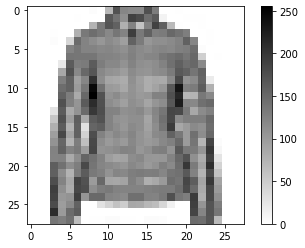

In [18]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28, 28))

# plot the image - viola a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Display the first 25 images of the training dataset and display the class name below each image. verify that the data is correct format and were are ready to biuld and train the network

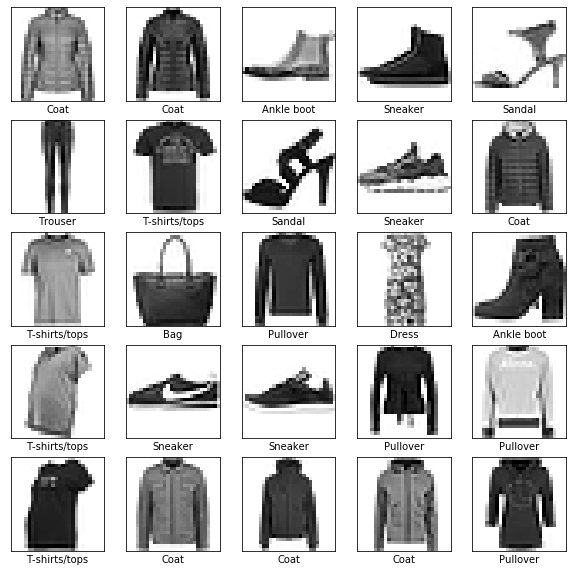

In [28]:
plt.figure(figsize=(10, 10))
i=0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1

plt.show()

BIULDING **THE** **MODEL**
**bold text**this entails biulding the neural networks by configuring the layers of the model, then compiling the model


In [0]:
# Biulding the model with three layers i.e input, hidden(128neurons), output(10 neurons i.e class names)
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dense(10)
      ])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [0]:
# training the model
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [36]:
# Fitting the model with 300k training examples due to 5 epochs i.e iterations
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 4.1686 - accuracy: 0.7003
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6990 - accuracy: 0.7364
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6287 - accuracy: 0.7686
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5613 - accuracy: 0.8034
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5334 - accuracy: 0.8205


In [37]:
# Evaluating the accuracy of the model
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.5737 - accuracy: 0.8138
Accuracy on test dataset: 0.8138


In [41]:
# Exploring and making Predictions
for test_images, test_labels in test_dataset.take(1):
  test_images =  test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

predictions.shape
# here the model has predicted the label of each image in the testing set

(32, 10)

In [42]:
# looking at the first prediction
predictions[0]

array([ 33.04377  ,  26.63621  ,  38.58913  ,  33.671715 ,  39.792282 ,
         3.8677344,  38.684223 , -33.286644 ,  31.7483   , -23.101212 ],
      dtype=float32)

A prediction is an array of 10 numbers. these describe the "confidence" of the model that the image corresponds to wach of the 10 different articles of clothing. the label with the highest confidence values is as shown above


In [45]:
np.argmax(predictions[0])

4

In [0]:
# Graphing this to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


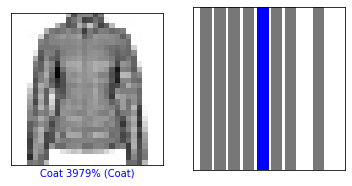

In [47]:
# Looking at the 0th image, predictions and prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

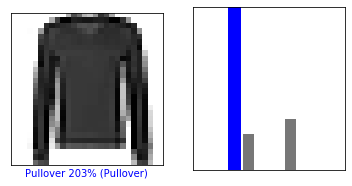

In [48]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.



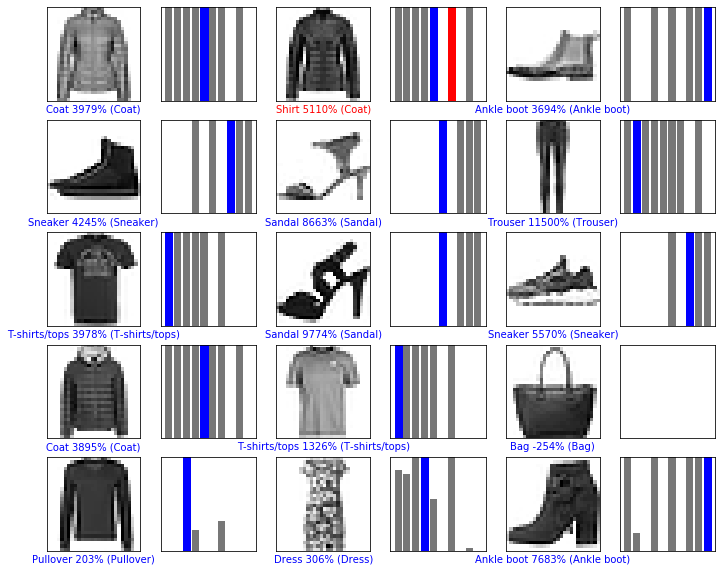

In [49]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


Finally, use the trained model to make a prediction about a single image

In [50]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [51]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [52]:
# now predict the image
predictions_single = model.predict(img)
print(predictions_single)

[[ 33.043777  26.636213  38.589134  33.67172   39.792286   3.867735
   38.684227 -33.286648  31.748304 -23.101213]]


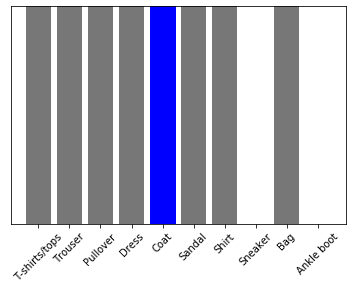

In [54]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)